In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [52]:
df = pd.read_csv("D:/prisha_manipal_sp/sp_rugved/co2.csv")

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [54]:
# preprocessing and cleaning the dataset

In [55]:
df = df.drop(columns=["Make", "Model", "Vehicle Class"])

In [56]:
df.isnull().sum()

Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [57]:
def one_hot_encode(df, column):
    dummies = pd.get_dummies(df[column], prefix=column)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(columns=[column])  
    return df

In [58]:
df = one_hot_encode(df, 'Transmission')
df = one_hot_encode(df, 'Fuel Type')

In [59]:
def z_score_normalize(df, columns):
    for column in columns:
        mean = df[column].mean()
        std = df[column].std()
        df[column] = (df[column] - mean) / std
    return df

In [60]:
numerical_columns = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
                     'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
                     'Fuel Consumption Comb (mpg)']
df = z_score_normalize(df, numerical_columns)

In [61]:
X = df.drop(columns=["CO2 Emissions(g/km)"]).values
y = df["CO2 Emissions(g/km)"].values.reshape(-1, 1)

In [62]:
X = np.array(X, dtype=np.float64)
y = np.array(y, dtype=np.float64)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

In [65]:
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

In [66]:
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        gradients = (1 / m) * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate * gradients
        cost_history.append(compute_cost(X, y, theta))

    return theta, cost_history
    

In [67]:
theta = np.zeros((X.shape[1], 1))  
learning_rate = 0.01  
iterations = 1000  
theta, cost_history = gradient_descent(X, y, theta, learning_rate, iterations)

In [68]:
theta = np.zeros((X_train.shape[1], 1))

In [69]:
learning_rate = 0.01
iterations = 400

In [70]:
theta, cost_history = gradient_descent(X_train, y_train, theta, learning_rate, iterations)

In [71]:
y_pred = X_test.dot(theta)

In [72]:
mse = np.mean((y_test - y_pred) ** 2)
print("Mean Squared Error on Test Data:", mse)

Mean Squared Error on Test Data: 342.6331412138243


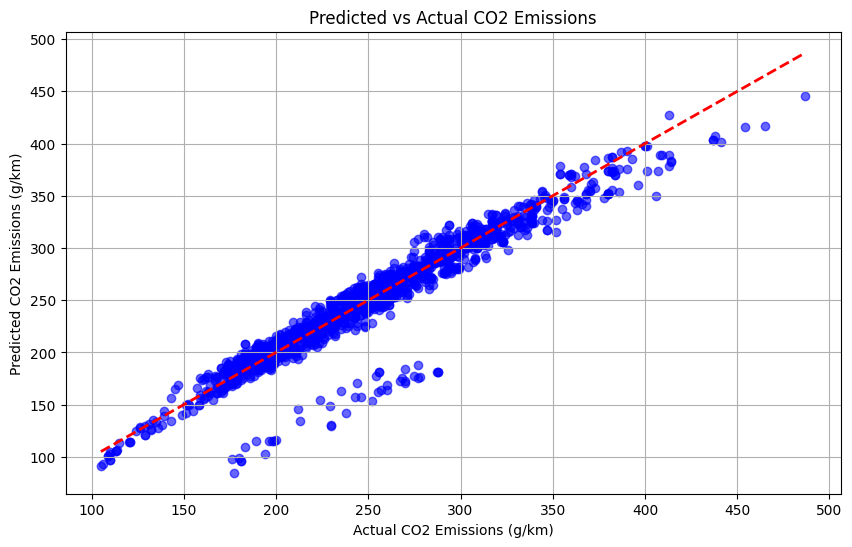

In [73]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.title("Predicted vs Actual CO2 Emissions")
plt.xlabel("Actual CO2 Emissions (g/km)")
plt.ylabel("Predicted CO2 Emissions (g/km)")
plt.grid()
plt.show()

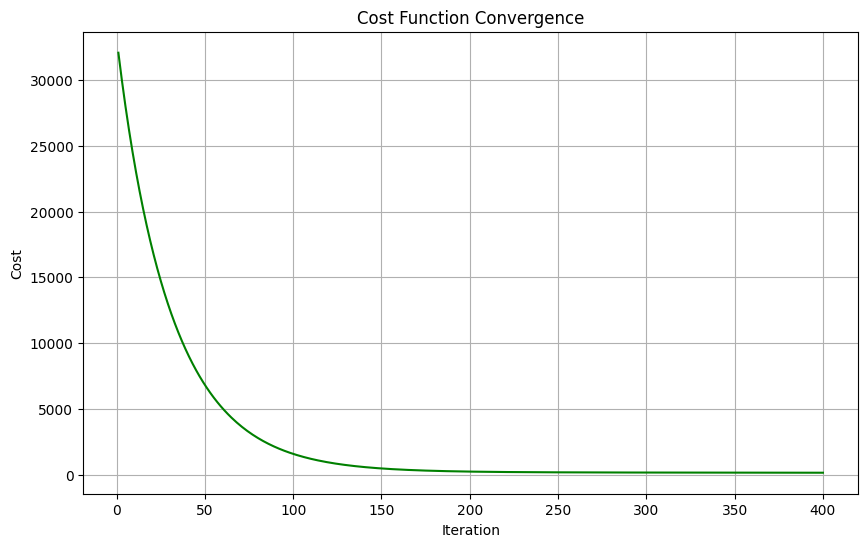

In [74]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cost_history) + 1), cost_history, color='green')
plt.title("Cost Function Convergence")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.grid()
plt.show()

In [75]:
# learn gradient descent properly cuz used in other models too
# try different evaluation metrics
# do eda before implementing the model
# check out encoding methods other than one hot encoding
# look up regularization
# augment the data
# do logistic regression task on heart.csv